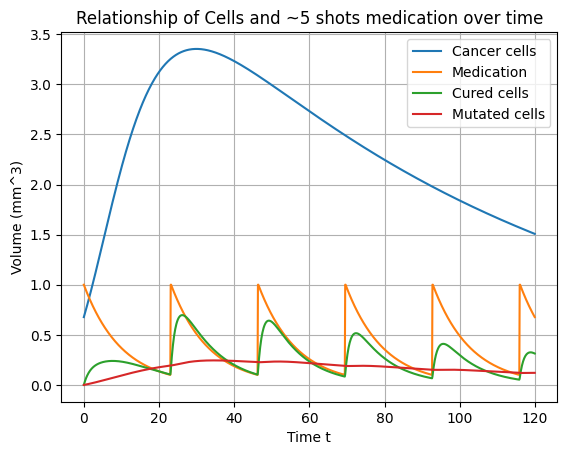

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define initial conditions
r = 0.1
rp = 0.1
k = 0.2
kp = 0.05
m = 0.1
mp = 0.01
delta = 0.1     # med degen rate 0.1
beta = 0.7
gamma = 0.01
C_1 = 5
C_2 = 1
C_3 = -1
C_4 = 0.0

h = 0.1  # Step size
n_steps = 1200  # Number of steps

# Time points
t = np.arange(0, n_steps * h, h)

# Initialize arrays for A, B, C, and Ap
A_values = np.zeros(n_steps)
B_values = np.zeros(n_steps)
C_values = np.zeros(n_steps)
Ap_values = np.zeros(n_steps)

# Define the ODE functions
def A(t):
    return C_1 * np.exp((r - m - mp) * t - (k * C_2) * np.exp(-delta * t) / delta)

def B(t):
    return C_2 * np.exp(-delta * t)

# RK4 scheme
def rk4_step(func, t, y, h):
    k1 = h * func(t)
    k2 = h * func(t + 0.5 * h)
    k3 = h * func(t + 0.5 * h)
    k4 = h * func(t + h)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Compute A and B values
for i in range(n_steps):
    A_values[i] = A(t[i])

counter = 0
for j in range(n_steps):
    B_values[j] = B(t[counter])
    counter += 1
    if B_values[j] < 0.1 and j != 0:
        B_values[j] = B(0)
        counter = 0

# Integrate C(t) and Ap(t) separately using trapezoidal rule
def C_integrand(t, A_values, B_values):
    return k * A_values * B_values * np.exp((beta + gamma) * t)

C_integral = np.zeros(n_steps)
for i in range(1, n_steps):
    C_integral[i] = np.trapz(C_integrand(t[:i+1], A_values[:i+1], B_values[:i+1]), t[:i+1])

C_values = np.exp(-(beta + gamma) * t) * (1 + C_integral) + C_3 * np.exp(-(beta + gamma) * t)

def Ap_integrand(t, A_values, C_values):
    return np.exp((rp + kp) * t) * (mp * A_values + gamma * C_values)

Ap_integral = np.zeros(n_steps)
for i in range(1, n_steps):
    Ap_integral[i] = np.trapz(Ap_integrand(t[:i+1], A_values[:i+1], C_values[:i+1]), t[:i+1])

Ap_values = np.exp(-(rp + kp) * t) * Ap_integral + C_4 * np.exp(-(rp + kp) * t)

# Plot results
plt.plot(t, A_values, label='Cancer cells')
plt.plot(t, B_values, label='Medication')
plt.plot(t, C_values, label='Cured cells')
plt.plot(t, Ap_values, label='Mutated cells')
plt.xlabel('Time t')
plt.ylabel('Volume (mm^3)')
plt.legend()
plt.title('Relationship of Cells and ~5 shots medication over time')
plt.grid(True)
plt.show()


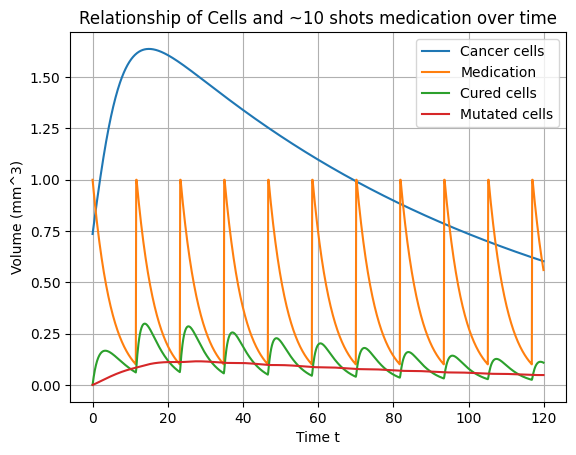

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define initial conditions
r = 0.1
rp = 0.1
k = 0.2
kp = 0.05
m = 0.1
mp = 0.01
delta = 0.2     # med degen rate 0.2
beta = 0.7
gamma = 0.01
C_1 = 2
C_2 = 1
C_3 = -1
C_4 = 0.0

h = 0.1  # Step size
n_steps = 1200  # Number of steps

# Time points
t = np.arange(0, n_steps * h, h)

# Initialize arrays for A, B, C, and Ap
A_values = np.zeros(n_steps)
B_values = np.zeros(n_steps)
C_values = np.zeros(n_steps)
Ap_values = np.zeros(n_steps)

# Define the ODE functions
def A(t):
    return C_1 * np.exp((r - m - mp) * t - (k * C_2) * np.exp(-delta * t) / delta)

def B(t):
    return C_2 * np.exp(-delta * t)

# RK4 scheme
def rk4_step(func, t, y, h):
    k1 = h * func(t)
    k2 = h * func(t + 0.5 * h)
    k3 = h * func(t + 0.5 * h)
    k4 = h * func(t + h)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Compute A and B values
for i in range(n_steps):
    A_values[i] = A(t[i])

counter = 0
for j in range(n_steps):
    B_values[j] = B(t[counter])
    counter += 1
    if B_values[j] < 0.1 and j != 0:
        B_values[j] = B(0)
        counter = 0
    

# Integrate C(t) and Ap(t) separately using trapezoidal rule
def C_integrand(t, A_values, B_values):
    return k * A_values * B_values * np.exp((beta + gamma) * t)

C_integral = np.zeros(n_steps)
for i in range(1, n_steps):
    C_integral[i] = np.trapz(C_integrand(t[:i+1], A_values[:i+1], B_values[:i+1]), t[:i+1])

C_values = np.exp(-(beta + gamma) * t) * (1 + C_integral) + C_3 * np.exp(-(beta + gamma) * t)

def Ap_integrand(t, A_values, C_values):
    return np.exp((rp + kp) * t) * (mp * A_values + gamma * C_values)

Ap_integral = np.zeros(n_steps)
for i in range(1, n_steps):
    Ap_integral[i] = np.trapz(Ap_integrand(t[:i+1], A_values[:i+1], C_values[:i+1]), t[:i+1])

Ap_values = np.exp(-(rp + kp) * t) * Ap_integral + C_4 * np.exp(-(rp + kp) * t)

# Plot results
plt.plot(t, A_values, label='Cancer cells')
plt.plot(t, B_values, label='Medication')
plt.plot(t, C_values, label='Cured cells')
plt.plot(t, Ap_values, label='Mutated cells')
plt.xlabel('Time t')
plt.ylabel('Volume (mm^3)')
plt.legend()
plt.title('Relationship of Cells and ~10 shots medication over time')
plt.grid(True)
plt.show()

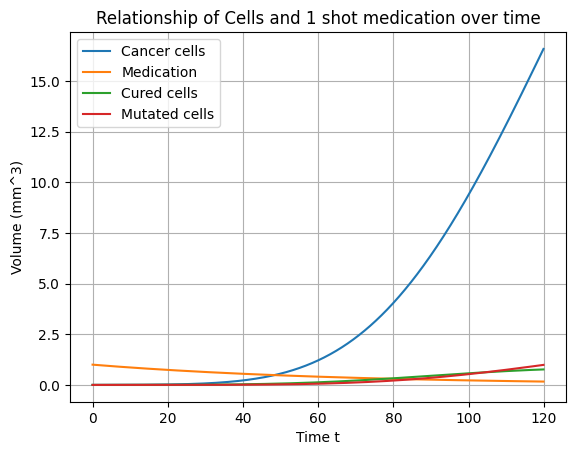

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define initial conditions
r = 0.1
rp = 0.1
k = 0.2
kp = 0.05
m = 0.1
mp = 0.01
delta = 0.015       # med degen rate 0.015
beta = 0.7
gamma = 0.01
C_1 = 500
C_2 = 1
C_3 = -1
C_4 = 0.0

h = 0.1  # Step size
n_steps = 1200  # Number of steps

# Time points
t = np.arange(0, n_steps * h, h)

# Initialize arrays for A, B, C, and Ap
A_values = np.zeros(n_steps)
B_values = np.zeros(n_steps)
C_values = np.zeros(n_steps)
Ap_values = np.zeros(n_steps)

# Define the ODE functions
def A(t):
    return C_1 * np.exp((r - m - mp) * t - (k * C_2) * np.exp(-delta * t) / delta)

def B(t):
    return C_2 * np.exp(-delta * t)

# RK4 scheme
def rk4_step(func, t, y, h):
    k1 = h * func(t)
    k2 = h * func(t + 0.5 * h)
    k3 = h * func(t + 0.5 * h)
    k4 = h * func(t + h)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Compute A and B values
for i in range(n_steps):
    A_values[i] = A(t[i])

counter = 0
for j in range(n_steps):
    B_values[j] = B(t[counter])
    counter += 1
    if B_values[j] < 0.1 and j != 0:
        B_values[j] = B(0)
        counter = 0
    

# Integrate C(t) and Ap(t) separately using trapezoidal rule
def C_integrand(t, A_values, B_values):
    return k * A_values * B_values * np.exp((beta + gamma) * t)

C_integral = np.zeros(n_steps)
for i in range(1, n_steps):
    C_integral[i] = np.trapz(C_integrand(t[:i+1], A_values[:i+1], B_values[:i+1]), t[:i+1])

C_values = np.exp(-(beta + gamma) * t) * (1 + C_integral) + C_3 * np.exp(-(beta + gamma) * t)

def Ap_integrand(t, A_values, C_values):
    return np.exp((rp + kp) * t) * (mp * A_values + gamma * C_values)

Ap_integral = np.zeros(n_steps)
for i in range(1, n_steps):
    Ap_integral[i] = np.trapz(Ap_integrand(t[:i+1], A_values[:i+1], C_values[:i+1]), t[:i+1])

Ap_values = np.exp(-(rp + kp) * t) * Ap_integral + C_4 * np.exp(-(rp + kp) * t)

# Plot results
plt.plot(t, A_values, label='Cancer cells')
plt.plot(t, B_values, label='Medication')
plt.plot(t, C_values, label='Cured cells')
plt.plot(t, Ap_values, label='Mutated cells')
plt.xlabel('Time t')
plt.ylabel('Volume (mm^3)')
plt.legend()
plt.title('Relationship of Cells and 1 shot medication over time')
plt.grid(True)
plt.show()

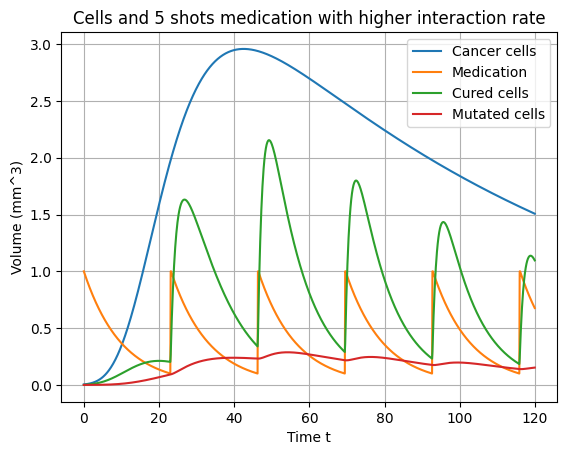

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define initial conditions
r = 0.1
rp = 0.1
k = 0.7         # interaction rate 0.7
kp = 0.05
m = 0.1
mp = 0.01
delta = 0.1     # med degen rate 0.1
beta = 0.7
gamma = 0.01
C_1 = 5
C_2 = 1
C_3 = -1
C_4 = 0.0

h = 0.1  # Step size
n_steps = 1200  # Number of steps

# Time points
t = np.arange(0, n_steps * h, h)

# Initialize arrays for A, B, C, and Ap
A_values = np.zeros(n_steps)
B_values = np.zeros(n_steps)
C_values = np.zeros(n_steps)
Ap_values = np.zeros(n_steps)

# Define the ODE functions
def A(t):
    return C_1 * np.exp((r - m - mp) * t - (k * C_2) * np.exp(-delta * t) / delta)

def B(t):
    return C_2 * np.exp(-delta * t)

# RK4 scheme
def rk4_step(func, t, y, h):
    k1 = h * func(t)
    k2 = h * func(t + 0.5 * h)
    k3 = h * func(t + 0.5 * h)
    k4 = h * func(t + h)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Compute A and B values
for i in range(n_steps):
    A_values[i] = A(t[i])

counter = 0
for j in range(n_steps):
    B_values[j] = B(t[counter])
    counter += 1
    if B_values[j] < 0.1 and j != 0:
        B_values[j] = B(0)
        counter = 0
    

# Integrate C(t) and Ap(t) separately using trapezoidal rule
def C_integrand(t, A_values, B_values):
    return k * A_values * B_values * np.exp((beta + gamma) * t)

C_integral = np.zeros(n_steps)
for i in range(1, n_steps):
    C_integral[i] = np.trapz(C_integrand(t[:i+1], A_values[:i+1], B_values[:i+1]), t[:i+1])

C_values = np.exp(-(beta + gamma) * t) * (1 + C_integral) + C_3 * np.exp(-(beta + gamma) * t)

def Ap_integrand(t, A_values, C_values):
    return np.exp((rp + kp) * t) * (mp * A_values + gamma * C_values)

Ap_integral = np.zeros(n_steps)
for i in range(1, n_steps):
    Ap_integral[i] = np.trapz(Ap_integrand(t[:i+1], A_values[:i+1], C_values[:i+1]), t[:i+1])

Ap_values = np.exp(-(rp + kp) * t) * Ap_integral + C_4 * np.exp(-(rp + kp) * t)

# Plot results
plt.plot(t, A_values, label='Cancer cells')
plt.plot(t, B_values, label='Medication')
plt.plot(t, C_values, label='Cured cells')
plt.plot(t, Ap_values, label='Mutated cells')
plt.xlabel('Time t')
plt.ylabel('Volume (mm^3)')
plt.legend()
plt.title('Cells and 5 shots medication with higher interaction rate')
plt.grid(True)
plt.show()
